## Importing Packages for Classification Models Using Machine Learning

In [2]:
#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding,feature selection
import numpy as np
import pandas as pd
import dtale 
import scipy.stats as stats
import sklearn

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif 

#Packages related to data visualizaiton
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import imblearn.over_sampling as over_sampling

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import  BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier as xgb
from xgboost import plot_tree
from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

In [2]:
# Import datasets
os.chdir(r'C:\Users\itsfe\Downloads\12. Capstone Case Study - Cyber Security Case Study\Datasets')

In [3]:
df1=pd.read_csv('Data_of_Attack_Back.csv')
df2=pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
df3=pd.read_csv('Data_of_Attack_Back_FTPWrite.csv',names=['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'])
df4=pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
df5=pd.read_csv('Data_of_Attack_Back_Neptune.csv')
df6=pd.read_csv('Data_of_Attack_Back_NMap.csv')
df7=pd.read_csv('Data_of_Attack_Back_Normal.csv')
df8=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
df9=pd.read_csv('Data_of_Attack_Back_RootKit.csv')
df10=pd.read_csv('Data_of_Attack_Back_Satan.csv')
df11=pd.read_csv('Data_of_Attack_Back_Smurf.csv')

## Data Preprocessing

In [4]:
df1['Attack']='Back'
df2['Attack']='BufferOverflow'
df3['Attack']='FTPWrite'
df4['Attack']='GuessPassword'
df5['Attack']='Neptune'
df6['Attack']='NMap'
df7['Attack']='Normal'
df8['Attack']='PortSweep'
df9['Attack']='RootKit'
df10['Attack']='Satan'
df11['Attack']='Smurf'

In [5]:
final=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])

In [6]:
final.columns=final.columns.str.replace(' ','' )

In [7]:
#Creating Y Binominal variable
final['bin_flag']=np.where(final.Attack=='Normal',0,1)

In [8]:
# Classifying errors into categories
dim={'Back':1,
 'BufferOverflow':4,
 'FTPWrite':3,
 'GuessPassword':3,
 'Neptune':1,
 'Normal':0, # This seems fair 
 'RootKit':4,
 'PortSweep':2,
 'Satan':2,
 'Smurf':1,
 'NMap':2,
 }

In [9]:
# Create Y Multinomial variable
final['M_attack']=final['Attack'].map(dim)

In [10]:
#Dropping the Attack variable
final.drop(columns=['Attack'],inplace=True)

In [11]:
#Summarising data
#dtl=dtale.show(final)
#dtl.open_browser()

In [12]:
# Final columns based on dtale report
final=final[['flag','logged_in','serror_rate','srv_error_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate','bin_flag','M_attack']]

# EDA

In [13]:
#Distribution of Y Binominal
final[['bin_flag']].value_counts()

bin_flag
0           576710
1           240841
dtype: int64

In [14]:
final[['bin_flag']].value_counts()/final[['bin_flag']].value_counts().sum()

bin_flag
0           0.705412
1           0.294588
dtype: float64

<AxesSubplot:xlabel='bin_flag', ylabel='count'>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


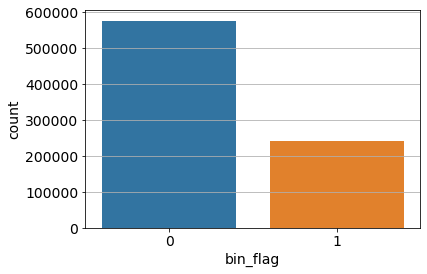

In [15]:
sns.countplot(x='bin_flag',data=final)

In [16]:
final[['M_attack']].value_counts()/final[['M_attack']].value_counts().sum()

M_attack
0           0.705412
1           0.282799
2           0.011665
3           0.000075
4           0.000049
dtype: float64

<AxesSubplot:xlabel='M_attack', ylabel='count'>

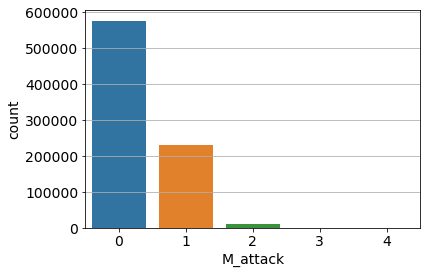

In [17]:
sns.countplot(x='M_attack',data=final)

In [18]:
col=final.columns

In [19]:
# Column segregation

Nomcol = ["protocol_type", "service", "flag"]
Bincol = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]

Numcol = list(set(col).difference(set(Nomcol).union(set(Bincol))).difference(['bin_flag','M_attack','num_outbound_cmds']))

In [20]:
final_num=final[Numcol]
final_num

,srv_error_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate,dst_host_serror_rate,srv_rerror_rate,diff_srv_rate,same_srv_rate,serror_rate
0,0.0,0.100,0.001,0.0,0.0,0.050,0.0,0.1,0.0
1,0.0,0.100,0.002,0.0,0.0,0.033,0.0,0.1,0.0
2,0.0,0.100,0.003,0.0,0.0,0.025,0.0,0.1,0.0
3,0.0,0.100,0.004,0.0,0.0,0.000,0.0,0.1,0.0
4,0.0,0.100,0.005,0.0,0.0,0.000,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...
3002,0.0,0.098,0.251,0.0,0.0,0.000,0.0,0.1,0.0
3003,0.0,0.099,0.252,0.0,0.0,0.000,0.0,0.1,0.0
3004,0.0,0.099,0.253,0.0,0.0,0.000,0.0,0.1,0.0
3005,0.0,0.100,0.254,0.0,0.0,0.000,0.0,0.1,0.0


In [21]:
#Splitting dataset into X and y
y=final.bin_flag
X=final[final.columns.difference(['bin_flag'])]
X

,M_attack,diff_srv_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,flag,logged_in,same_srv_rate,serror_rate,srv_error_rate,srv_rerror_rate
0,1,0.0,0.100,0.0,0.001,0.0,0.0,0.1,0.1,0.0,0.0,0.050
1,1,0.0,0.100,0.0,0.002,0.0,0.0,0.1,0.1,0.0,0.0,0.033
2,1,0.0,0.100,0.0,0.003,0.0,0.0,0.1,0.1,0.0,0.0,0.025
3,1,0.0,0.100,0.0,0.004,0.0,0.0,0.1,0.1,0.0,0.0,0.000
4,1,0.0,0.100,0.0,0.005,0.0,0.0,0.1,0.1,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3002,1,0.0,0.098,0.0,0.251,0.0,0.0,0.0,0.1,0.0,0.0,0.000
3003,1,0.0,0.099,0.0,0.252,0.0,0.0,0.0,0.1,0.0,0.0,0.000
3004,1,0.0,0.099,0.0,0.253,0.0,0.0,0.0,0.1,0.0,0.0,0.000
3005,1,0.0,0.100,0.0,0.254,0.0,0.0,0.0,0.1,0.0,0.0,0.000


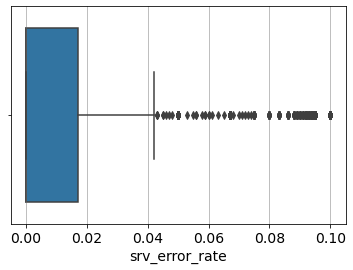

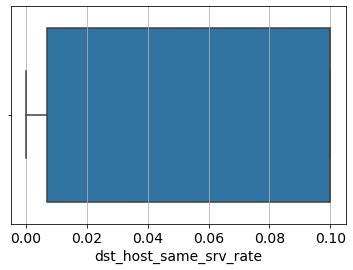

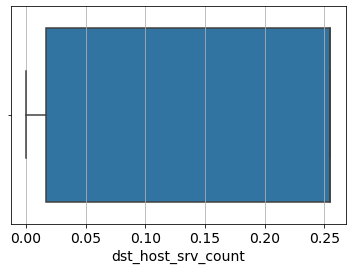

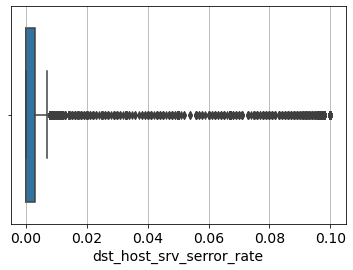

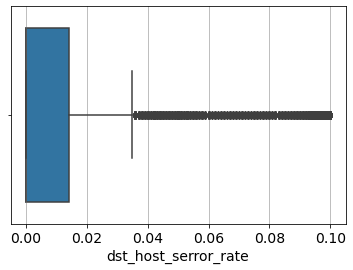

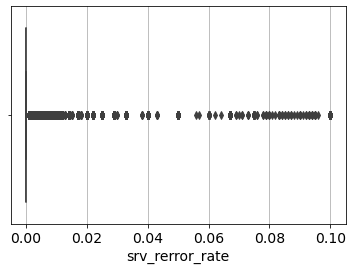

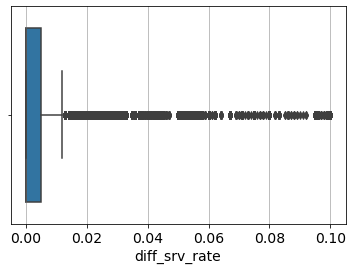

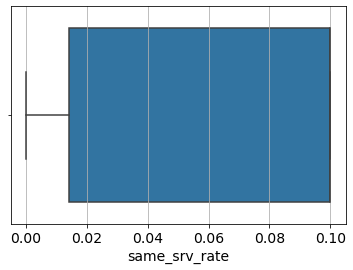

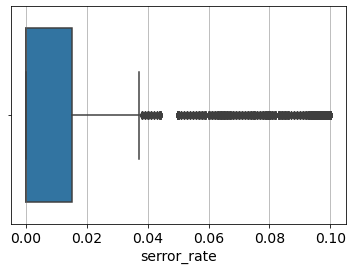

In [22]:
#Checking for outliers
for i in Numcol:
    sns.boxplot(final[i])
    plt.show()

In [23]:
#Outlier treatment
for i in Num_col:
    _,bp=pd.DataFrame.boxplot(Num_col[i],return_type='both')
    whiskers=[whiskers.get_ydata()for whiskers in bp['whiskers']]
    print(i)
    print(whiskers)
    Num_col[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(Num_col[i])
    plt.show()

In [25]:
# Checking for low variance
l=[]
for i in Numcol:
    if len(final[i].unique()) <2:
        l.append(i)
        print(i,final[i].unique())
print(l)

[]


In [26]:
X_new=X.columns.difference(['srv_rerror_rate','M_attack'])
final_new=final.drop(columns=['srv_rerror_rate','M_attack'])
final_X=final[['flag', 'logged_in', 'serror_rate', 'srv_error_rate', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate' 
       ]]

In [27]:
#Verifying missings
X_new.isnull().sum().sum()


0

<AxesSubplot:>

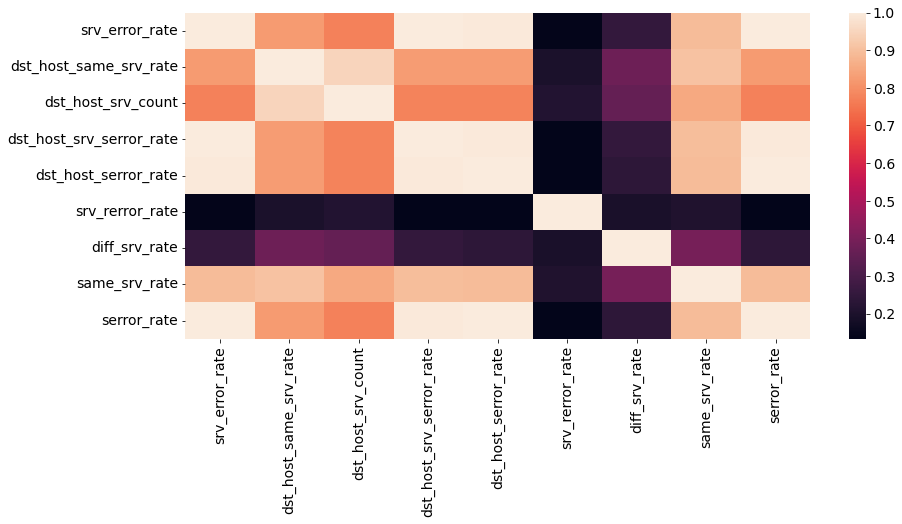

In [28]:
# visualize correlation matrix in Seaborn using a heatmap for Numerical columns
plt.figure(figsize=(14,6))
sns.heatmap(final_num.corr().abs())

In [29]:
final_num.corrwith(y).abs().sort_values(ascending=False)

same_srv_rate               0.965912
dst_host_same_srv_rate      0.902920
dst_host_srv_serror_rate    0.888492
srv_error_rate              0.887411
dst_host_serror_rate        0.887263
serror_rate                 0.886822
dst_host_srv_count          0.854154
diff_srv_rate               0.345551
srv_rerror_rate             0.219622
dtype: float64

In [30]:
#Balancing the data
sm = over_sampling.SMOTE(random_state=123)
final_X, y = sm.fit_resample(final_X,y)

# Feature Selection

In [31]:
#### Univariate Regression

somerced_val = pd.DataFrame()
for i_var in X_new:
    print(i_var)
    model = smf.logit('bin_flag~'+str(i_var), data=final_new).fit()
    somerce_d = 2*metrics.roc_auc_score(final_new.bin_flag, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val,temp], axis=0)
  

diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.413927
         Iterations 8
dst_host_same_srv_rate
Optimization terminated successfully.
         Current function value: 0.118491
         Iterations 10
dst_host_serror_rate
Optimization terminated successfully.
         Current function value: 0.176473
         Iterations 11
dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.148217
         Iterations 10
dst_host_srv_serror_rate
Optimization terminated successfully.
         Current function value: 0.175255
         Iterations 12
flag
Optimization terminated successfully.
         Current function value: 0.085986
         Iterations 9
logged_in
Optimization terminated successfully.
         Current function value: 0.185127
         Iterations 10
same_srv_rate
Optimization terminated successfully.
         Current function value: 0.065425
         Iterations 9
serror_rate
Optimization terminated successfully

In [32]:
somerced_val.columns=['feature','somerce_d']

In [33]:
imp_vars_df=somerced_val.sort_values(by='somerce_d',ascending=False).head(15)
imp_vars_df

,feature,somerce_d
0,dst_host_same_srv_rate,0.969084
0,flag,0.966831
0,same_srv_rate,0.966416
0,dst_host_srv_count,0.960644
0,diff_srv_rate,0.950415
0,logged_in,0.898313
0,dst_host_serror_rate,0.850556
0,serror_rate,0.850068
0,srv_error_rate,0.83986
0,dst_host_srv_serror_rate,0.835495


In [34]:
imp_vars_somerce=list(imp_vars_df.feature)

In [35]:
#### RFE
classifier = RandomForestClassifier()
rfe = RFE(estimator=classifier,n_features_to_select=15,step=1)
rfe = rfe.fit(final_X,y)

KeyboardInterrupt: 

In [ ]:
imp_vars_RFE = list(final_X.columns[rfe.support_])

In [ ]:
imp_vars_RFE 

In [ ]:
SKB=SelectKBest(f_classif,k=10).fit(final_X,y)

In [ ]:
SKB.get_support()
imp_vars_SKB = list(final_X.columns[SKB.get_support()])

In [ ]:
imp_vars_SKB

In [ ]:
imp_var=list(set(imp_vars_SKB+imp_vars_RFE
                +imp_vars_somerce))
imp_var

In [36]:
X_fin=final_X[[#'flag',
 #'dst_host_srv_count',
 'dst_host_serror_rate',
 'diff_srv_rate',
 #'serror_rate',
 #'dst_host_srv_serror_rate',
 #'dst_host_same_srv_rate',
 #'same_srv_rate',
 'logged_in',
 #'srv_error_rate'
]]

In [37]:
# Calculation of VIF
vif=pd.DataFrame()
vif['VIF_factor']=[variance_inflation_factor(X_fin.values,i) for i in range(X_fin.shape[1])]
vif['Features']=X_fin.columns
vif.sort_values(by='VIF_factor',ascending=False)

,VIF_factor,Features
1,1.171256,diff_srv_rate
0,1.170162,dst_host_serror_rate
2,1.001054,logged_in


VIF value is less than 5 for all the columns.

In [38]:
#Splitting data into train and test
train_X,test_X,train_y,test_y=train_test_split(X_fin,y,test_size=0.3,random_state=123)
train=pd.concat([train_X,test_X],axis=0)
test=pd.concat([test_X,test_y],axis=0)

# Binomial Modelling Traditional

In [39]:
formula='bin_flag~'+'+'.join(train_X)
formula

'bin_flag~dst_host_serror_rate+diff_srv_rate+logged_in'

In [40]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

In [41]:
logreg = smf.logit(formula=formula, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.091748
         Iterations 11


In [42]:
print(result.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.868      
Dependent Variable:    bin_flag           AIC:                148162.3487
Date:                  2022-11-21 14:26   BIC:                148208.7550
No. Observations:      807394             Log-Likelihood:     -74077.    
Df Model:              3                  LL-Null:            -5.5964e+05
Df Residuals:          807390             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        11.0000                                           
-------------------------------------------------------------------------
                      Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------------
Intercept              0.1625   0.0069   23.4655 0.0000   0.1490   0.1761
dst_host_serror_rate  71.5561   0.7231   98.9548 0.0000  70.1388  72

In [43]:
train_gini = 2*metrics.roc_auc_score(train['bin_flag'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['bin_flag'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['bin_flag'], result.predict(train))
test_auc = metrics.roc_auc_score(test['bin_flag'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.992251537662896
The Gini Index for the model built on the Test Data is :  0.9923411105953677
The AUC for the model built on the Train Data is :  0.996125768831448
The AUC for the model built on the Test Data is :  0.9961705552976838


In [44]:
## Train Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_y, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
259262,0,0.003143
262349,0,0.003143
28252,1,0.999530
824535,1,0.999553
754911,0,0.003143


In [45]:
## Test Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_y, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
996012,1,0.003143
710504,0,0.003143
1130220,1,0.999506
1122544,1,0.999506
937400,1,0.999530


In [46]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1, num=100):
    TN = metrics.confusion_matrix(train_y, np.where(train_predict.prob>cut_off,1,0))[0][0]
    TP = metrics.confusion_matrix(train_y, np.where(train_predict.prob>cut_off,1,0))[1][1]
    FN = metrics.confusion_matrix(train_y, np.where(train_predict.prob>cut_off,1,0))[1][0]
    FP = metrics.confusion_matrix(train_y, np.where(train_predict.prob>cut_off,1,0))[0][1]
    sensitivity = TP/(FN+TP)
    specificity = TN/(TN+FP)
    accuracy = (TP+TN)/(TP+TN+FN+FP)
    total = sensitivity+ specificity
    temp_df = pd.DataFrame([cut_off, sensitivity, specificity, accuracy,total]).T
    roc_df = pd.concat([roc_df, temp_df], axis=0)
   

In [47]:
roc_df.columns=['cut_off','sensitivity','specificity','accuracy','total']

roc_df=roc_df.sort_values(by='total',ascending=False)
best_cutoff=roc_df.head(1)['cut_off']
best_cutoff

0    0.585859
Name: cut_off, dtype: float64

In [48]:
train_predict['pred']=np.where(train_predict.prob>0.585859,1,0)
test_predict['pred']=np.where(test_predict.prob>0.585859,1,0)

In [49]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.pred))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.pred))

The overall accuracy score for the Train Data is :  0.9832597220192372
The overall accuracy score for the Test Data  is :  0.9833422921976961


In [50]:
print(metrics.classification_report(train_predict.actual, train_predict.pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    403610
           1       1.00      0.97      0.98    403784

    accuracy                           0.98    807394
   macro avg       0.98      0.98      0.98    807394
weighted avg       0.98      0.98      0.98    807394



In [51]:
print(metrics.classification_report(test_predict.actual, test_predict.pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    173100
           1       1.00      0.97      0.98    172926

    accuracy                           0.98    346026
   macro avg       0.98      0.98      0.98    346026
weighted avg       0.98      0.98      0.98    346026



# Binomial Modelling- Logistic ML

In [52]:
#Build the model
model = LogisticRegression()
model = model.fit(train_X, train_y)

In [53]:
#Train probability
LR_Trainprob=pd.DataFrame(model.predict_proba(train_X), index=train_X.index)
LR_Trainprob.columns=['LR_Trainprob_fl','LR_Trainprob_tr']
LR_Trainprob

,LR_Trainprob_fl,LR_Trainprob_tr
259262,0.994723,0.005277
262349,0.994723,0.005277
28252,0.002042,0.997958
824535,0.001966,0.998034
754911,0.994723,0.005277
...,...,...
194278,0.002201,0.997799
1066306,0.002120,0.997880
28030,0.002042,0.997958
277869,0.994723,0.005277


In [54]:
LR_Testprob=pd.DataFrame(model.predict_proba(test_X), index=test_X.index)
LR_Testprob.columns=['LR_Testprob_fl','LR_Testprob_tr']
LR_Testprob


,LR_Testprob_fl,LR_Testprob_tr
996012,0.994723,0.005277
710504,0.994723,0.005277
1130220,0.002120,0.997880
1122544,0.002120,0.997880
937400,0.002042,0.997958
...,...,...
279966,0.994723,0.005277
497938,0.994414,0.005586
589577,0.994723,0.005277
649222,0.994723,0.005277


In [55]:
# Best threshold
fpr, tpr, thresh=metrics.roc_curve(train_y, LR_Trainprob.LR_Trainprob_tr)
cutoff=thresh[np.argmax(tpr-fpr)] 

cutoff

0.5800741888506701

In [56]:
# Train predict
LR_Trainprob['pred']=np.where(LR_Trainprob.LR_Trainprob_tr>0.5800741888506701,1,0)#0.5024555333786321

In [57]:
LR_Testprob['pred']=np.where(LR_Testprob.LR_Testprob_tr>0.5800741888506701,1,0)

In [58]:
# Train Confusion matrix
print(metrics.classification_report(train_y,LR_Trainprob['pred']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    403610
           1       0.99      0.97      0.98    403784

    accuracy                           0.98    807394
   macro avg       0.98      0.98      0.98    807394
weighted avg       0.98      0.98      0.98    807394



In [59]:
# Test Confusion matrix
print(metrics.classification_report(test_y,LR_Testprob['pred']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    173100
           1       1.00      0.97      0.98    172926

    accuracy                           0.98    346026
   macro avg       0.98      0.98      0.98    346026
weighted avg       0.98      0.98      0.98    346026



# Binomial Modelling- KNN

In [60]:
#Standardization of data
sc = StandardScaler()
std_train = sc.fit_transform(train_X)
std_test = sc.fit_transform(test_X)

In [61]:
std_data_train = pd.DataFrame(std_train, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(std_test, columns=test_X.columns, index = test_X.index )

In [62]:
model_knn = KNeighborsClassifier().fit(std_data_train, train_y)

In [63]:
train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [64]:
#Classification report
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    403610
           1       0.99      0.97      0.98    403784

    accuracy                           0.98    807394
   macro avg       0.98      0.98      0.98    807394
weighted avg       0.98      0.98      0.98    807394



In [65]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    173100
           1       0.99      0.97      0.98    172926

    accuracy                           0.98    346026
   macro avg       0.98      0.98      0.98    346026
weighted avg       0.98      0.98      0.98    346026



# Binomial Modelling- DT

In [66]:
#Finding best parameters
param_grid_dt = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [67]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),param_grid_dt ,scoring='roc_auc',n_jobs=-1,cv=5,verbose=True)

In [68]:
dt_fit=dt_grid.fit(train_X,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [69]:
dt_fit.best_score_

0.9965320019574921

In [70]:
dt_fit.cv_results_

{'mean_fit_time': array([1.04713941, 0.90877013, 1.09308629, 0.79660749]),
 'std_fit_time': array([0.05313891, 0.10732901, 0.0761201 , 0.17701812]),
 'mean_score_time': array([0.10996623, 0.18437514, 0.23884544, 0.16899214]),
 'std_score_time': array([0.01911497, 0.02633045, 0.02566949, 0.04562887]),
 'param_max_depth': masked_array(data=[3, 3, 4, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[3, 4, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'max_features': 3},
  {'max_depth': 3, 'max_features': 4},
  {'max_depth': 4, 'max_features': 3},
  {'max_depth': 4, 'max_features': 4}],
 'split0_test_score': array([0.99596962, 0.99596962, 0.99653625, 0.99653625]),
 'split1_test_score': array([0.99587023, 0.99587023, 0.99643815, 0.99643815]),
 'split2_test_score': array([0.99600153, 0.99600153, 0.99655504,

In [71]:
dt_fit.best_params_

{'max_depth': 4, 'max_features': 3}

In [72]:
dt_model=DecisionTreeClassifier(max_depth= 4, max_features=4).fit(train_X,train_y)

In [73]:
dt_train_pred=dt_model.predict(train_X)
dt_test_pred=dt_model.predict(test_X)

In [74]:
print(metrics.classification_report(train_y,dt_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    403610
           1       0.99      0.97      0.98    403784

    accuracy                           0.98    807394
   macro avg       0.98      0.98      0.98    807394
weighted avg       0.98      0.98      0.98    807394



In [75]:
print(metrics.classification_report(test_y,dt_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    173100
           1       1.00      0.97      0.98    172926

    accuracy                           0.98    346026
   macro avg       0.98      0.98      0.98    346026
weighted avg       0.98      0.98      0.98    346026



In [76]:
text_=tree.export_text(dt_model)
print(text_)

|--- feature_1 <= 0.00
|   |--- feature_2 <= 0.05
|   |   |--- feature_0 <= 0.00
|   |   |   |--- feature_0 <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.00
|   |   |   |--- feature_0 <= 0.09
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.09
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.05
|   |   |--- feature_0 <= 0.00
|   |   |   |--- feature_1 <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.00
|   |   |   |--- feature_0 <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.00
|   |   |   |   |--- class: 0
|--- feature_1 >  0.00
|   |--- feature_2 <= 0.09
|   |   |--- feature_1 <= 0.03
|   |   |   |--- feature_0 <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.00
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.03
|   |   |   |--- feature_0 <= 0.00
| 

[Text(0.5, 0.9, 'diff_srv_rate <= 0.003\ngini = 0.5\nsamples = 807394\nvalue = [403610, 403784]\nclass = 1'),
 Text(0.25, 0.7, 'logged_in <= 0.05\ngini = 0.063\nsamples = 413300\nvalue = [399907, 13393]\nclass = 0'),
 Text(0.125, 0.5, 'dst_host_serror_rate <= 0.001\ngini = 0.361\nsamples = 49402\nvalue = [37714, 11688]\nclass = 0'),
 Text(0.0625, 0.3, 'dst_host_serror_rate <= 0.0\ngini = 0.325\nsamples = 46756\nvalue = [37195, 9561]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.322\nsamples = 45419\nvalue = [36267, 9152]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.425\nsamples = 1337\nvalue = [928, 409]\nclass = 0'),
 Text(0.1875, 0.3, 'dst_host_serror_rate <= 0.086\ngini = 0.315\nsamples = 2646\nvalue = [519, 2127]\nclass = 1'),
 Text(0.15625, 0.1, 'gini = 0.434\nsamples = 1505\nvalue = [479, 1026]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.068\nsamples = 1141\nvalue = [40, 1101]\nclass = 1'),
 Text(0.375, 0.5, 'dst_host_serror_rate <= 0.0\ngini = 0.009\nsamples = 363898\nvalue = [3621

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


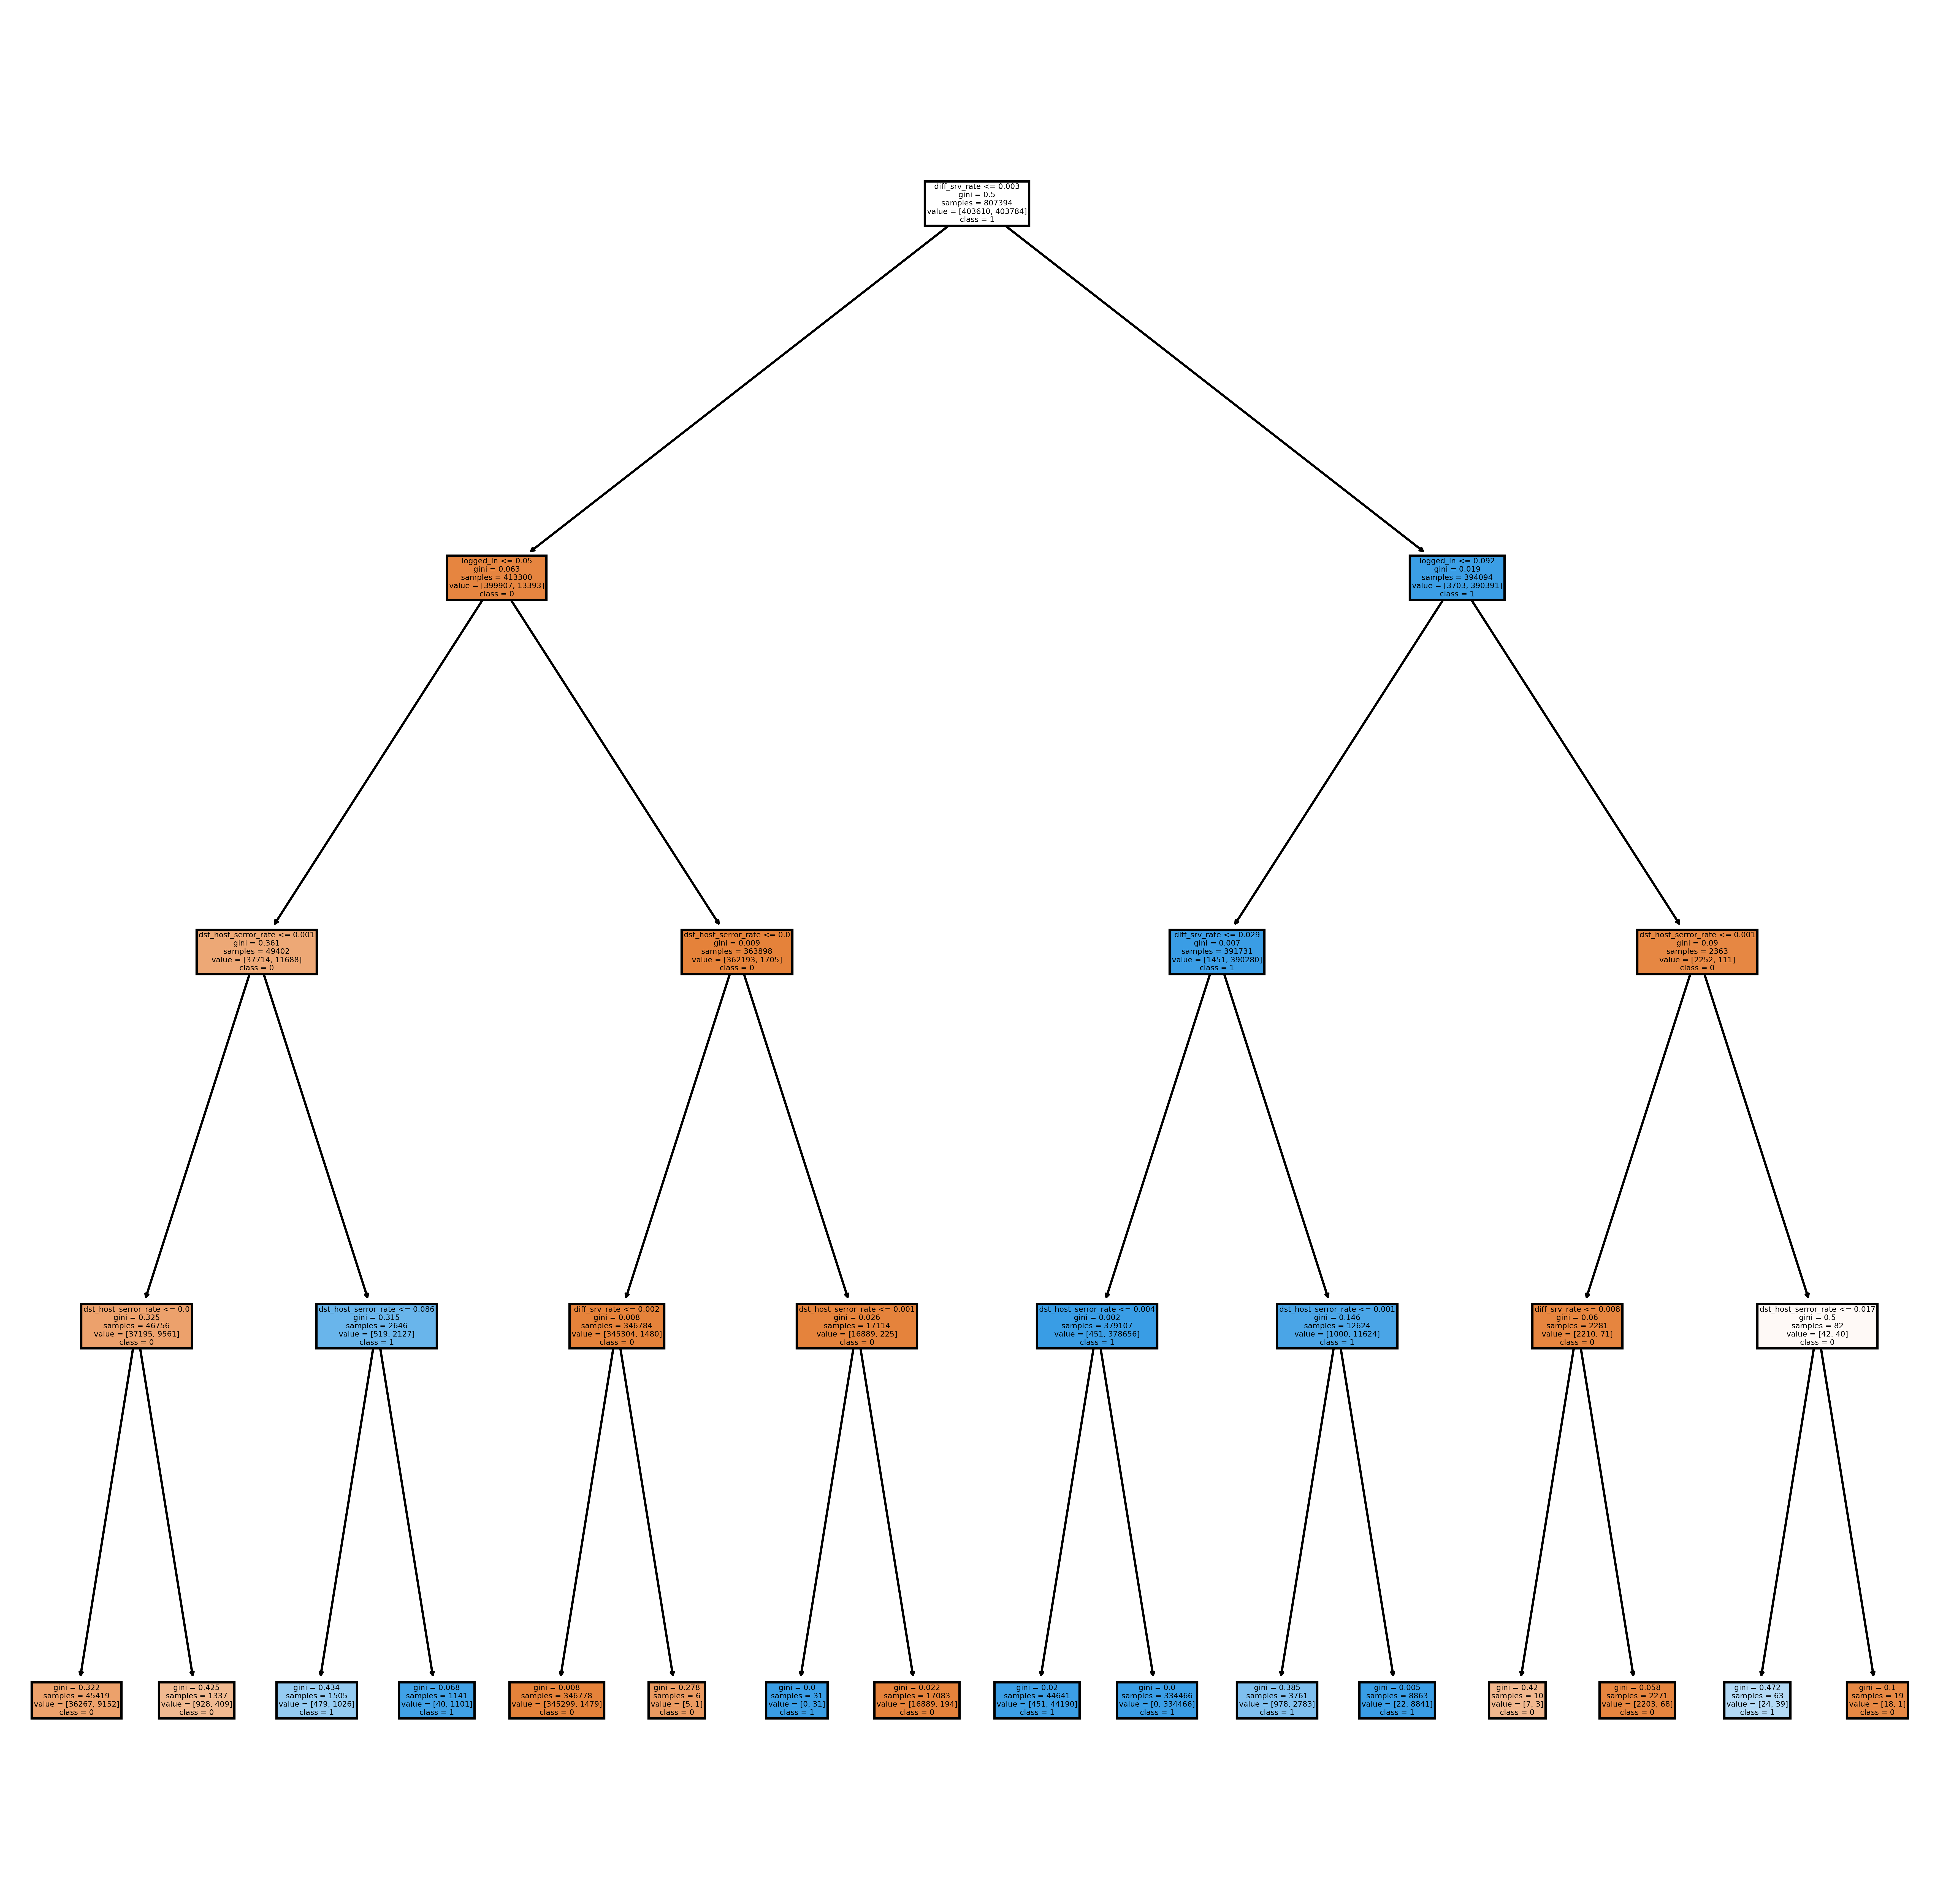

In [77]:
fig, axes = plt.subplots(nrows = 1 , ncols = 1, figsize =(15,15), dpi=600)
tree.plot_tree(dt_model,feature_names=X_fin.columns,class_names="01",filled=True)

# Binomial Modelling-XGBoost

In [78]:
#Finding the best parameters using GRidSearchCV

param_grid = {'n_estimators':[100,500,600],
            'learning_rate': [0.1,0.2,0.3],
            'colsample_bytree':[0.4,0.5,0.6],
            'gamma':[0,1,2,3]
            'learning_rate':[0.1,0.2,0.3] ,
             }

SyntaxError: invalid syntax (117108412.py, line 7)

In [ ]:
grid=GridSearchCV(estimator=xgb(),param_grid=param_grid,n_jobs=-1,cv=5,verbose=True)

In [ ]:
grid_fit=grid.fit(train_X,train_y)

In [ ]:
grid_fit.cv_results_

In [ ]:
grid_fit.best_params_

In [ ]:
grid_fit.best_score_

In [ ]:
xg_cls=XGBClassifier(colsample_bytree=0.4, gamma=0,
       learning_rate=0.3,
       n_estimators=600,
       random_state = 42)

In [ ]:
xg_model=xg_cls.fit(train_X, train_y)

In [ ]:
image= xgboost.to_graphviz(xg_model)
#image.render('Xgbmodel',format="pdf")


In [ ]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(xg_model.predict_proba(train_X))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(xg_model.predict_proba(test_X))[1]))

# Binomial Modelling-Random Forest

In [ ]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100],'max_features': [2,3,4,5,6,7,8,9],'max_depth': [2,3,4,5,6,7,8,9]}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(), param_grid,scoring='f1', cv=5, n_jobs=-1, verbose=True)

In [ ]:
grid_fit=grid.fit(train_X, train_y)

In [ ]:
grid_fit.cv_results_

In [ ]:
grid_fit.best_score_

In [ ]:
grid_fit.best_params_

In [ ]:
rand_model = RandomForestClassifier(n_estimators=50 , max_depth = 9, max_features=7, n_jobs=-1)
rand_model.fit( train_X, train_y )

In [ ]:
#Predicting train and test
train_pred=rand_model.predict(train_X)
test_pred=rand_model.predict(test_X)

In [ ]:
#Confusion matrix
matrix=confusion_matrix(train_y,train_pred)

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=[7,6])
sns.heatmap(matrix)
plt.plot

In [ ]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(model.predict_proba(train_X))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(model.predict_proba(test_X))[1]))

In [ ]:
# Printing classification report for train
print(metrics.classification_report(train_y, train_pred))

In [ ]:
# Printing classification report for test
print(metrics.classification_report(test_y, test_pred))

# Multinomial Classification

## Data preprocessing

In [ ]:
multi_X=final[final.columns.difference(['M_attack','bin_flag'])]
multi_y=final[['M_attack']]

In [ ]:
#Oversampling for multinominal classification
sm = over_sampling.SMOTE(random_state=123)
multi_X,multi_y = sm.fit_resample(multi_X,multi_y)

In [ ]:
# Checking if data is balanced
multi_y.value_counts()

# Feature Reduction

In [ ]:
#### RFE
classifier = LogisticRegression()
rfe = RFECV(estimator=classifier, min_features_to_select=15,scoring="accuracy",cv=5,verbose=True,n_jobs=-1)
#rfe = rfe.fit(multi_X, multi_y)

In [ ]:
imp_vars_RFE = list(multi_X.columns[rfe.support_])

In [ ]:
imp_vars_RFE

In [ ]:
#### Select K best
SKB = SelectKBest(f_classif, k=8).fit(multi_X, multi_y )

In [ ]:
SKB.get_support()
imp_vars_SKB = list(multi_X.columns[SKB.get_support()])

In [ ]:
imp_vars_SKB

In [ ]:
fxy=list(set(imp_vars_SKB+imp_vars_RFE))
fxy

In [ ]:
#Check for multicollinearity

X_fin=multi_X[['dst_host_srv_count',
 #'srv_error_rate',
 'serror_rate',
 #'same_srv_rate',
 #'dst_host_serror_rate',
 'diff_srv_rate',
 'logged_in',
 #'dst_host_srv_serror_rate',
 #'flag',
 #'dst_host_same_srv_rate',
 'srv_rerror_rate'
  ]]

In [ ]:
vif=pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_fin.values, i) for i in range(X_fin.shape[1])]
vif["features"] = X_fin.columns

In [ ]:
vif=vif.sort_values(by="VIF_Factor",ascending=False)
vif

# Splitting into train and test

In [ ]:
train_X,test_X,train_y,test_y=train_test_split(X_fin,multi_y,test_size=0.3,random_state=123)

In [ ]:
train_M=pd.concat([train_X,train_y],axis=1)
test_M=pd.concat([test_X,test_y],axis=1)

# Multinominal Modelling- Bagging

In [ ]:
pargrid_bag = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_bag, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_fit=gscv_bagging.fit(train_X,train_y)

In [ ]:
gscv_fit.cv_results_

In [ ]:
gscv_fit.best_score_

In [ ]:
gscv_fit.best_params_

In [ ]:
model_bag=BaggingClassifier(n_estimators= 60).fit(train_X,train_y)

In [ ]:
pred_train=model_bag.predict(train_X)
pred_test=model_bag.predict(test_X)

In [ ]:
print(metrics.classification_report(train_y,pred_train))

In [ ]:
print(metrics.classification_report(test_y,pred_test))

# Multinominal Modelling- Random Forest

In [ ]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
model=radm_clf.fit( train_X, train_y)

In [ ]:
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

In [ ]:
print(metrics.classification_report(train_y,train_pred))

In [ ]:
print(metrics.classification_report(test_y,test_pred))

# Multinominal Modelling- Adaboost

In [ ]:
#Establishing the grid
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [ x for x in range(-3, 3)]}

In [ ]:
#Hyperparameter tuning with GridsearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
#Fitting the data
gscv_ada.fit(train_X,train_y)

In [ ]:
gscv_ada.cv_results_

In [ ]:
gscv_ada.best_score_

In [ ]:
#Calling the best parameters
gscv_ada.best_params_

In [ ]:
#Building the model
mod_ada=AdaBoostClassifier(learning_rate=2, n_estimators=600).fit(train_X,train_y)

In [ ]:
#Predicting values for train and test
train_pred=mod_ada.predict(train_X)
test_pred=mod_ada.predict(test_X)

In [ ]:
#Classification report for train
print(metrics.classification_report(train_y,train_pred))

In [ ]:
#Classification report for test
print(metrics.classification_report(test_y,test_pred))

# Multinominal Modelling-XGBoost

In [ ]:
#Establishing grid
param_grid = {'n_estimators':[100,500,600],
            'learning_rate': [0.1,0.2,0.3] }


In [ ]:
#Hyperparameter tuning using GridsearchCV
grid=GridSearchCV(xgb(),param_grid,n_jobs=-1,verbose=True,cv=5)

In [ ]:
#Fitting the data
grid.fit(train_X, train_y)

In [ ]:
grid.cv_results_

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
#Building the model
xgb_model=XGBClassifier().fit(train_X,train_y)

In [ ]:
#Predicting the values for train and test
xg_train=xgb_model.fit(train_X)
xg_test=xgb_model.fit(test_X)

In [ ]:
#Confusion matrix
cm=confusion_matrix(train_y.values,xg_train)
cm

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=[6,9])
sns.heatmap(cm)
plt.plot

In [ ]:
#Classification Report for train
print(metrics.classification_report(train_y,xg_train))


In [ ]:
#Classification Report for test
print(metrics.classification_report(test_y,xg_test))